In [1]:
#Name: Becca Dura

import pandas
import numpy
#Read in dataset
data = pandas.read_csv('bikeshare_projectA.csv')

In [2]:
#Look at dataset
data
#Use cnt, weathersit, atempc, month, holiday, weekday

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,tempc,atempc,humpercent,windspeed,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,8.175849,7.999250,80.5833,10.749882,985
1,2,1/2/2011,1,0,1,0,0,0,2,9.083466,7.346774,69.6087,16.652113,801
2,3,1/3/2011,1,0,1,0,1,1,1,1.229108,-3.499270,43.7273,16.636703,1349
3,4,1/4/2011,1,0,1,0,2,1,1,1.400000,-1.999948,59.0435,10.739832,1562
4,5,1/5/2011,1,0,1,0,3,1,1,2.666979,-0.868180,43.6957,12.522300,1600
5,6,1/6/2011,1,0,1,0,4,1,1,1.604356,-0.608206,51.8261,6.000868,1606
6,7,1/7/2011,1,0,1,0,5,1,2,1.236534,-2.216626,49.8696,11.304642,1510
7,8,1/8/2011,1,0,1,0,6,0,2,-0.245000,-5.291236,53.5833,17.875868,959
8,9,1/9/2011,1,0,1,0,0,0,1,-1.498349,-8.332450,43.4167,24.250650,822
9,10,1/10/2011,1,0,1,0,1,1,1,-0.910849,-6.041392,48.2917,14.958889,1321


In [3]:
def regression_kNN(new_example,train_data,k):
    #Make a copy of the training set to prevent it from being damaged
    train_data_copy = train_data.copy()
    #Calculates the Euclidean distance
    train_data_copy['distance_to_new'] = numpy.sqrt(
        (new_example['atempc']-train_data_copy['atempc'])**2
        +(new_example['holiday']-train_data_copy['holiday'])**2
        +(new_example['weathersit']-train_data_copy['weathersit'])**2
        +(new_example['weekday']-train_data_copy['weekday'])**2
        +(new_example['mnth']-train_data_copy['mnth'])**2)
    #Sorts the data based on Euclidean distance
    sorted_data = train_data_copy.sort_values(['distance_to_new'])
    #Finds the mean of the cnt of the first k examples to find the average/prediction
    prediction = sorted_data[0:k]['cnt'].mean()
    #Return the prediction
    return prediction

def regression_all_kNN(test_data,train_data,k):
    #Applies the regression_kNN function to each item in the test data with the train data and k passed 
    #as the other two arguments. The result will be a series of the individual results.
    return test_data.apply(regression_kNN,args=(train_data,k),axis=1)

def mean_abs_error(actual,predicted):
    #Finds the difference between the actual and predicted cnt 
    diff = abs(actual-predicted)
    #Calculates the mean absolute error
    mae = sum(diff)/len(actual)
    #Returns the mean absolute error
    return mae

In [4]:
#Shuffles the data, so we can "sample" the full set in random order
shuffled_data = data.sample(frac=1)

#Uses the first 70 rows (approximately 10%) in the shuffled dataset as testing data
test_data = shuffled_data.iloc[0:70]
#Uses the rest of the dataset as training data
train_data = shuffled_data.iloc[70:]

#Normalizes each of the predictor variables
a_mean = data['atempc'].mean()
a_std = data['atempc'].std()
data['atempc'] = data['atempc'].fillna(a_mean)
data['atempc'] = (data['atempc'] - a_mean)/a_std

h_mean = data['holiday'].mean()
h_std = data['holiday'].std()
data['holiday'] = (data['holiday']-h_mean)/h_std

w_mean = data['weathersit'].mean()
w_std = data['weathersit'].std()
data['weathersit'] = data['weathersit'].fillna(w_mean)
data['weathersit'] = (data['weathersit'] - w_mean)/w_std

wk_mean = data['weekday'].mean()
wk_std = data['weekday'].std()
data['weekday'] = data['weekday'].fillna(wk_mean)
data['weekday'] = (data['weekday'] - wk_mean)/wk_std

m_mean = data['mnth'].mean()
m_std = data['mnth'].std()
data['mnth'] = data['mnth'].fillna(m_mean)
data['mnth'] = (data['mnth'] - m_mean)/m_std

#Applies regression and prints the predictions for the number of bikes rented in the test dataset examples as well as the
#actual number of bikes rented in the test dataset examples
#Plugs the best k value (taken from the graph below) into the algorithm
predictions5NN = regression_all_kNN(test_data,train_data,5)
print(test_data['cnt'])
print(predictions5NN)
mean_abs_error(test_data['cnt'],predictions5NN)

133    3409
250    1842
689    5634
688    5499
441    7836
566    5870
421    3389
655    7461
644    7965
419    3487
189    5336
83     2210
53     1917
489    6296
194    5084
412    4154
98     2455
284    2416
403    2802
553    4840
460    6457
184    6043
425    4990
564    5713
440    4378
220    4602
230    4153
703    6606
7       959
34     1708
       ... 
471    6370
118    4595
43     1589
73     2056
99     2895
2      1349
559    7499
483    4220
301     627
243    5115
356    2209
104    3126
727    3095
131    4864
122    4451
399    2832
623    8714
461    6460
549    6660
288    5041
22      986
280    5409
291    2424
278    4765
62     1944
684    5445
94     1795
474    6565
486    5740
728    1341
Name: cnt, Length: 70, dtype: int64
133    6119.8
250    3543.0
689    3877.0
688    4058.8
441    5126.0
566    5645.4
421    2764.0
655    5329.0
644    6053.8
419    4417.4
189    5974.8
83     3008.2
53     2545.4
489    6179.8
194    6616.0
412    3429.2
98     2

1134.1400000000006

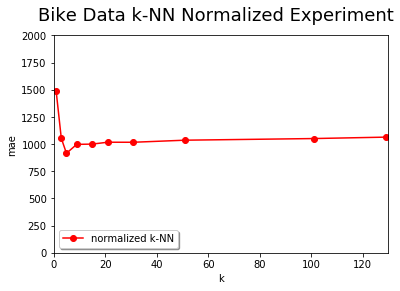

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

#Reload the dataset
data = pandas.read_csv('bikeshare_projectA.csv')

#Reshuffle the data, so it's in a random order
shuffled_data = data.sample(frac=1)

#Take the first 70 rows in the shuffled dataset as testing data
test_data = shuffled_data.iloc[0:70]
#Use the rest of the shuffled dataset as training data
train_data = shuffled_data.iloc[70:]

#Normalizes each of the predictor variables
a_mean = data['atempc'].mean()
a_std = data['atempc'].std()
data['atempc'] = data['atempc'].fillna(a_mean)
data['atempc'] = (data['atempc'] - a_mean)/a_std

h_mean = data['holiday'].mean()
h_std = data['holiday'].std()
data['holiday'] = (data['holiday']-h_mean)/h_std

w_mean = data['weathersit'].mean()
w_std = data['weathersit'].std()
data['weathersit'] = data['weathersit'].fillna(w_mean)
data['weathersit'] = (data['weathersit'] - w_mean)/w_std

wk_mean = data['weekday'].mean()
wk_std = data['weekday'].std()
data['weekday'] = data['weekday'].fillna(wk_mean)
data['weekday'] = (data['weekday'] - wk_mean)/wk_std

m_mean = data['mnth'].mean()
m_std = data['mnth'].std()
data['mnth'] = data['mnth'].fillna(m_mean)
data['mnth'] = (data['mnth'] - m_mean)/m_std

#Use these k values
k_vals = [1,3,5,9,15,21,31,51,101,129]
kNN_mae = []

#Calculates the mean absolute error for each k value listed above and places it into a list
for k in k_vals:
    
    predictions = regression_all_kNN(test_data,train_data,k)
    current_mae = mean_abs_error(test_data['cnt'],predictions)
    kNN_mae.append(current_mae)

    
#Creates the plot and labels the graph
plt.suptitle('Bike Data k-NN Normalized Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('mae')
plt.plot(k_vals,kNN_mae,'ro-',label='normalized k-NN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,130,0,2000])

plt.show()